In [30]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3] # achicar figuras

# N intervalos y puntos
Nint = 20
Nvec = Nint+1

# Dominio space-time
xs = np.linspace(0,1,Nvec)
h = 1/Nint
dt = 1e-2
tf = 0.1 # t0 = 0

# Operadores discretos
A = np.zeros((Nvec, Nvec))
I = np.eye(Nvec)
u = np.zeros(Nvec)
b = np.zeros(Nvec)

In [31]:
for k in range(1, Nvec-1):
    A[k, k-1] = -1 / h**2
    A[k,k] = 2 / h**2
    A[k, k+1] = -1 / h**2
    b[k] = 0

# Condiciones de borde
A[0,0] = 1
b[0] = 0
A[Nvec-1, Nvec-1] = 1
b[Nvec-1] = 0

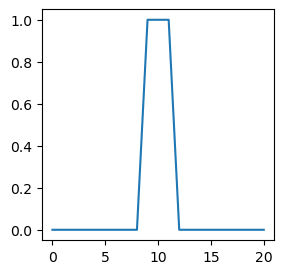

In [32]:
# Condición inicial
u0 = (xs > 0.4) & (xs < 0.6)
u[:] = u0

_ = plt.plot(u0)

def f(x): 
    return 1 # np.sin(x)

def sol(x):
    return 0.5 * x * (1-x)

In [33]:
from numpy.linalg import solve
t = dt
us = [u.copy()] # u == u0 al empezar
while t < tf:
    print(f"Solving  t={t:2.4f}")
    Alhs = I +dt*A # Exp: I, Imp: I + dt A
    brhs = u # Exp: u - dt A u, Imp: u
    u = solve(Alhs, brhs)
    us.append(u.copy())
    t += dt

Solving  t=0.0100
Solving  t=0.0200
Solving  t=0.0300
Solving  t=0.0400
Solving  t=0.0500
Solving  t=0.0600
Solving  t=0.0700
Solving  t=0.0800
Solving  t=0.0900
Solving  t=0.1000


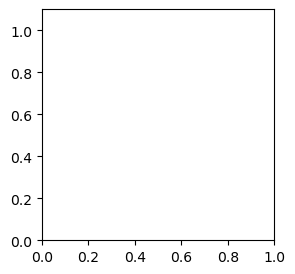

In [34]:
fig, ax = plt.subplots(figsize=(3,3))
line, = ax.plot([], [], 'b', lw=2)
ax.set_xlim(0,1)
ax.set_ylim(0,1.1)

def drawframe(n):
    line.set_data(xs, us[n])
    return line,

In [35]:
from IPython.display import HTML # pip install ffmpeg
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=10, interval=100, blit=True)
HTML(anim.to_html5_video())

In [36]:
UU = np.array(us)

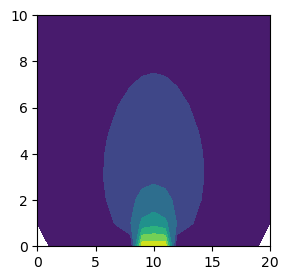

In [37]:
plt.contourf(UU)
plt.show()

In [38]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

2 2


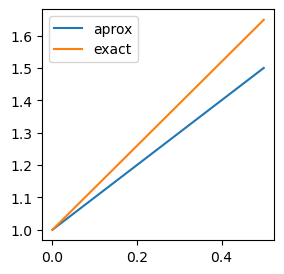

In [54]:
y0 = 1
ys = []
dt = 0.5
tf = 1
y = y0
ys.append(y)
times = np.arange(dt, tf, dt)
for t in times:
    y = y + dt  * y # Exp
    # y = 1 / (1-dt) * y # Imp
    ys.append(y)

times = np.arange(0,tf, dt)
print(len(times), len(ys))
plt.plot(times, ys, label="aprox")
plt.plot(times, np.exp(times), label="exact")
plt.legend()
plt.show()

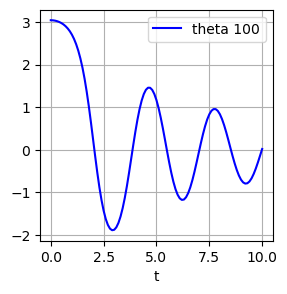

In [59]:
import numpy as np

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
def solve(N):
    t = np.linspace(0, 10, 101)
    from scipy.integrate import odeint
    sol = odeint(pend, y0, t, args=(b, c))
    import matplotlib.pyplot as plt
    return t, sol[:,0]

t100, sol100 = solve(5)
plt.plot(t100, sol100, 'b', label='theta 100')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()